<a href="https://colab.research.google.com/github/carvalhopinheiro/Ciencia-de-Dados/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://github.com/PAlab0/PAlab0/blob/main/logo.png?raw=true">


*by [Paulo Victor](https://www.linkedin.com/in/carvalhopinheiro/)*

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. 
* Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://github.com/carvalhopinheiro/Coisas-Salvas/blob/main/Detec%C3%A7%C3%A3o%20de%20em%20cart%C3%A3o%20de%20credito.png?raw=true" width="100%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Fonte dos Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.


<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="70%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

## Projeto Didático
Esse projeto faz parte do roteiro de estudo e atividades práticas do curso Data Science Na Prática do professor Carlos Melo da plataforma Sigmoidal.

Esse tipo de projeto pode levar você a se interessar mais sobre o que é ciência de dados e como ela pode te ajudar a enfrentar problemas reais, sejam eles empresariais ou não.
 
O projeto se enquadra dentro do módulo de Machine Learning que em tradução literal significa Aprendizado de Máquina a qual faz parte das vastas habilidades em data science.


###Instalação e Importação das Bibliotecas necessárias

In [311]:
!pip install -q scikit-plot # INSTALAÇÃO DA BIBLIOTECA

In [312]:
# IMPORTANDO OS PACOTES NECESSÁRIOS
import pandas as pd # MANIPULAÇÃO E ANÁLISE DE DADOS 
import matplotlib.pyplot as plt # VISUALIZAÇÃO DE DADOS
import seaborn as sns # VISUALIZAÇÃO DE DADOS
from sklearn.preprocessing import StandardScaler # PADRONIZAÇÃO DOS DADOS
from sklearn.model_selection import train_test_split # DIVISÃO DOS DADOS EM TESTE E TREINO 
from imblearn.under_sampling import RandomUnderSampler # BALANCEAMENTO DOS DADOS
from imblearn.over_sampling import RandomOverSampler # BALANCEAMENTO DOS DADOS
from sklearn.linear_model import LogisticRegression # MODELO DE REGRESSÃO LOGÍSTICA
from sklearn.tree import DecisionTreeClassifier # MODELO DE ÁRVORE DE DECISÃO
import scikitplot as skplt # GRÁFICO DE CONFUSÃO
from sklearn.metrics import classification_report # MÉTRICAS DE DESEMPENHO DO MODELO
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score # MÉTRICAS DE DESEMPENHO DO MODELO

### Importação dos dados

In [313]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.



##Análise Exploratória

A seguir, vamos observar as primeiras e últimas entradas do dataset, como também o tipo de cada variável presente nele, quantidade de valores nulos e visualizações gráficas sobre determinadas óticas.


###Quantidade de entrandas e variáveis

In [314]:
print(f'O dataset conta com {df.shape[0]:} entradas')
print(f'O dataset conta com {df.shape[1]} variáveis')

O dataset conta com 284807 entradas
O dataset conta com 31 variáveis


In [315]:
# 5 PRIMEIRAS ENTRADAS
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [316]:
# 5 ULTIMAS ENTRADAS
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


###Quais os tipos das variáveis 

In [317]:
# TIPO DAS VARIÁVEIS PRESENTE NO DATASET
display(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Nota-se que as variáveis estão em sua maioria no formato `FLOAT`, o que significa que são valores com casas decimais, com exceção da variável `CLASS` que representa somente 2 valores (0 ou 1) a qual definem se a operação bancária foi normal ou fraudulenta.

###Quantidade de Valores nulos 

In [318]:
df.isnull().sum().max()

0

O dataset não possui nenhum valor nulo em nenhuma das variáveis, ou seja, todas as linhas estão preenchidas com algum valor.

### Resumo estatístico das variáveis

Como o dataset sofreu uma transformação de PCA, as únicas variáveis que podemos analisar e extrair informações estatísticas são `TIME E AMOUNT`.

In [319]:
# RESUMO ESTATÍSTICO DAS VARIÁVEIS TIME E AMOUNT
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Podemos ver na variável `AMOUNT` que significa o valor da transação que 50% das transações tem valor máximo de `$22` e 75% das transações tem valor máximo de `$77`,ou seja, as fraudes tendem a ocorrer com operações com baixa quantidade monetária, porém isso já era de se esperar pois seria mais proveitoso fazer fraudes em valores pequenos e não ser descoberto do que fazer operações com valores altíssimos 
 
Entretanto, o valor mínimo de transação bancária registrada foi de `$0`, fica o questionamento se isso seria algum erro do dataset ou se o valor realmente está correto, para vermos o que podemos fazer vamos analisar quantas operações tem o valor `$0` como transação.


#### Quantidade de transações com valor zero

In [320]:
# QUANTIDADE DE TRANSAÇÕES COM VALOR IGUAL A ZERO
print(f'{df[df.Amount == 0].Class.value_counts().sum() / df.shape[0] *100:2f}%')
# EXCLUINDO TRANSAÇÕES COM VALOR IGUAL A ZERO DO DATASET
df.drop(df[df.Amount == 0].index, axis=0, inplace=True)

0.640785%


Como não temos informações relativas a esses tipos de transferência e sua funcionalidade, como também essas transações com valor igual a zero não devem ser uma preocupação para o banco, fizemos a exclusão delas visto que representavam somente 0,64% dos dados.

###Os dados estão balanceados?

---
VALE RESSALTAR QUE OS VALORES DE CLASS SIGNIFICAM:
* 0 - REPRESENTAM UMA OPERAÇÃO LEGÍTIMA
* 1 - REPRESENTAM OPERAÇÕES FRAUDULENTAS
---

Fraudes representam 0.16% no dataset
0    282517
1       465
Name: Class, dtype: int64


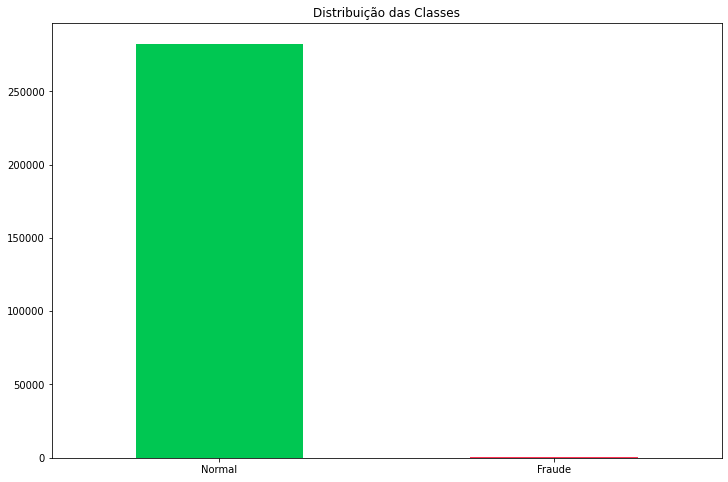

In [321]:
verde = '#00C752'
vermelho = '#FE3353'
uniao = ['#00C752','#FE3353']
fig, ax = plt.subplots(figsize=(12,8))
df.Class.value_counts().plot(kind='bar', ax=ax, color=uniao);
ax.set_title('Distribuição das Classes')
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.xticks(rotation='horizontal')
plt.plot()
print(f'Fraudes representam {df[df.Class == 1].shape[0] / df.shape[0] * 100:.2f}% no dataset')
print(df.Class.value_counts())

Vemos que os dados estão totalmente desbalanceados, o que era de se esperar que a quantidade de operações fraudulentas deverá ser naturalmente menor que a quantidade de operações menores, essa visualização também foi importante para analisarmos se existe algum tipo de operação fraudulenta, pois  é totalmente possível que o dataset disponibilizado não tivesse esse tipo de dado e isso inviabilizaria todo o modelo a ser criado.

Como as unicas variáveis do dataset que não sofreram um processo de transformado PCA foram `TIME & AMOUNT` vamos plotar histogramas da variavel `CLASS` e ver como ela se comporta em relação a elas.


###Histograma da variável Class por tempo

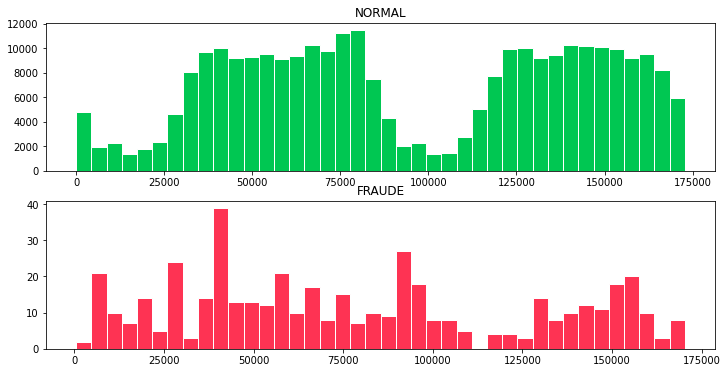

In [322]:
# PLOT DE HISTOGRAMA DA VARIÁVEL CLASS POR TEMPO
fig, ax = plt.subplots(nrows=2, ncols=1 ,figsize=(12, 6))
df.Time[df.Class == 0].hist(ax=ax[0], grid=False, bins=40, ec = 'w', color=verde)
ax[0].set_title('NORMAL')
df.Time[df.Class == 1].hist(ax=ax[1], grid=False, bins=40, ec = 'w',color=vermelho)
ax[1].set_title('FRAUDE')
plt.show()

###Histograma da variável Class pela variável Amount

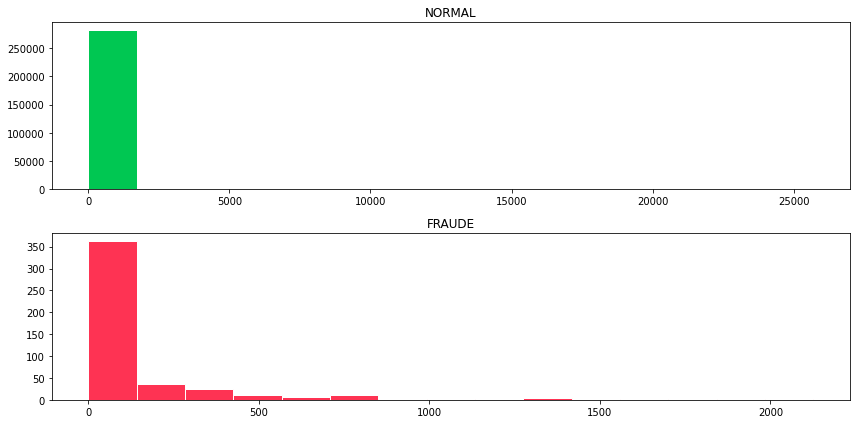

In [323]:
# PLOT DE HISTOGRAMA DA VARIÁVEL CLASS POR AMOUNT
fig, ax = plt.subplots(nrows=2, ncols=1 ,figsize=(12, 6))
df.Amount[df.Class == 0].hist(ax=ax[0], grid=False, bins=15, ec = 'w', color=verde)
ax[0].set_title('NORMAL')
df.Amount[df.Class == 1].hist(ax=ax[1], grid=False, bins=15, ec = 'w', color=vermelho)
ax[1].set_title('FRAUDE')
plt.tight_layout()
plt.show()

Podemos ver que as operações normais acontecem em maior quantidade em intervalos de tempo, mas as operações fraudulentas não seguem um padrão para conseguirmos fazer uma análise descritiva
 
Já em relação a valor vemos que a maioria das operações fraudulentas acontecem em torno do valor máximo de aproximadamente ``$100``, mas existem aquelas operações fraudulentas que possuem valor mais alto chegando próximo aos ``$1400``.

###Boxplot da variável class

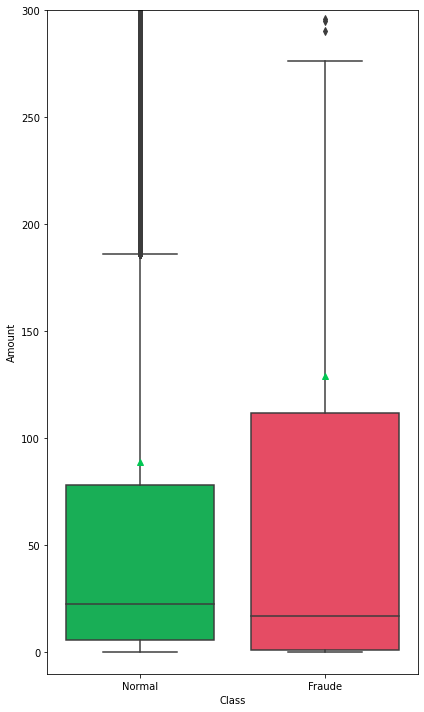

In [324]:
#BOXPLOT DA VARIÁVEL CLASS EM RELAÇÃO AO AMOUNT
fig, ax = plt.subplots(figsize=(6,10), sharex=True)
sns.set_palette(uniao)
sns.boxplot(x= df.Class, y= df.Amount, showmeans=True, ax=ax)
plt.ylim((-10, 300))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()
plt.show()

O boxplot reforça visualmente as análises feitas acima que as fraudes possuem medianas abaixo das operações normais e 75% das fraudes possuem valor máximo de aproximadamente ``$120``, valores usados pelos criminosos para tentar passar despercebidos.

###Histograma de todas as variaveis por class

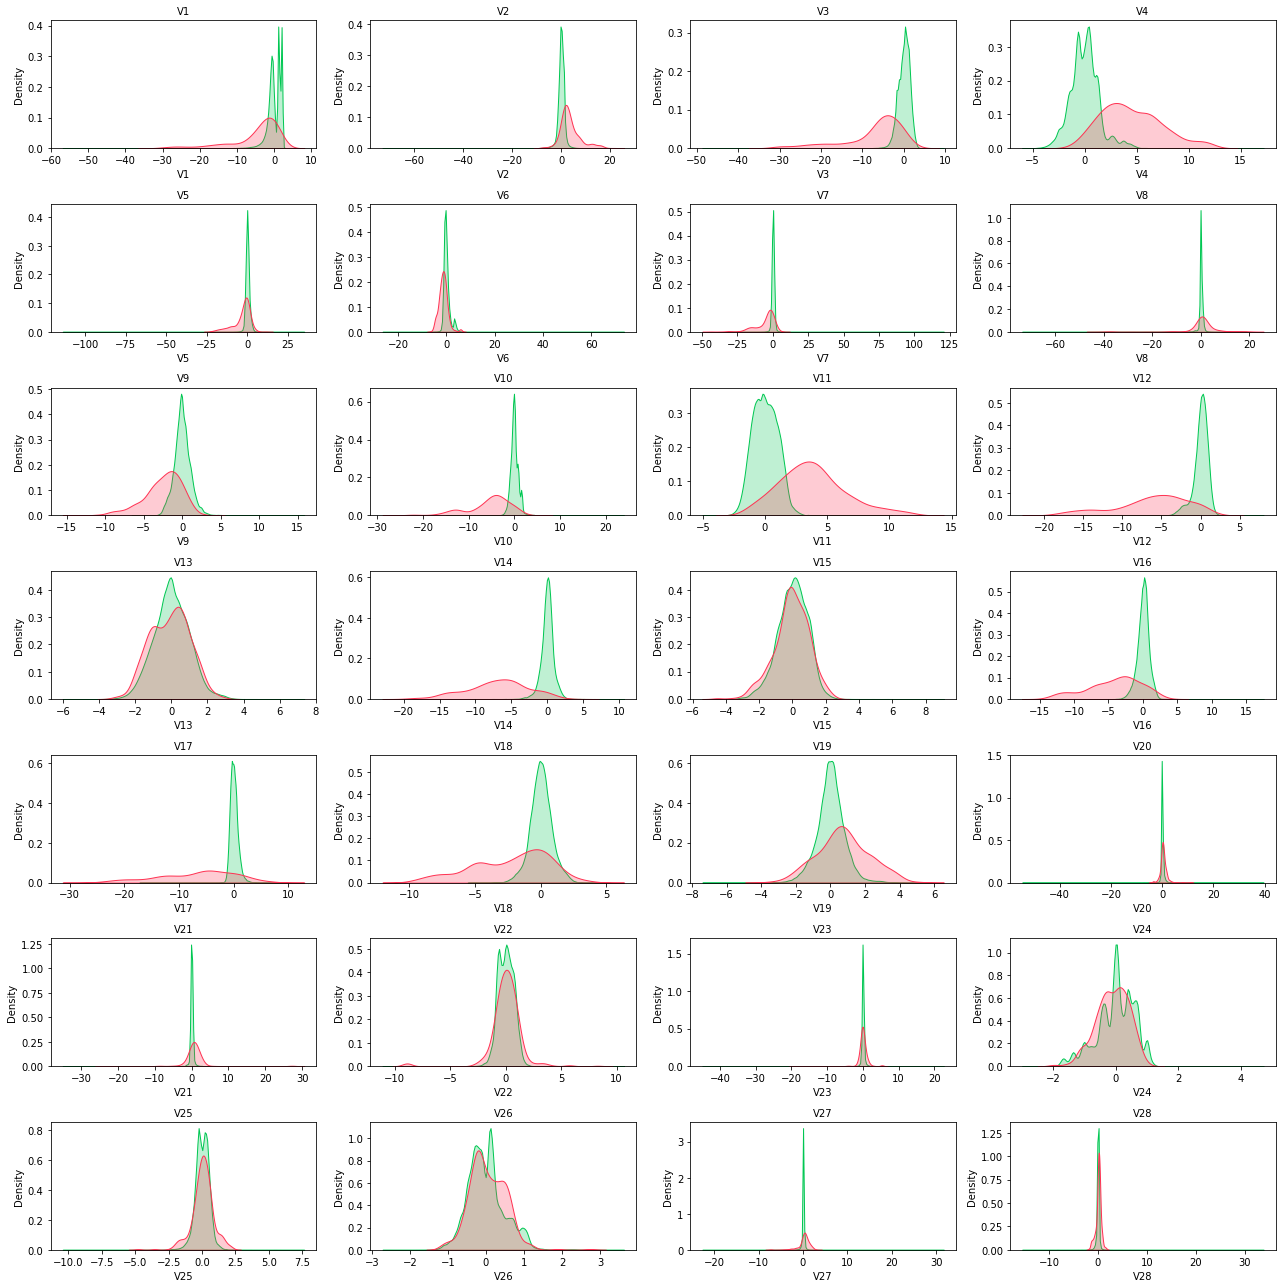

In [325]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color=verde)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color=vermelho)
    plt.title(col, fontsize=10)
plt.tight_layout()


Os gráficos representam a quantidade de operações normais em verde e operações fraudulentas em intervalos de valor de cada variável do dataset, logo podemos ver que as variáveis:
* ``V3-V4``,``V9-V12``,``V14``,``V16-V18`` - Apresentam comportamento entre Operações normais e Operações fraudulentas distintas, não seguem a mesma distribuição normal 
* As outras variáveis possuem comportamentos bastante semelhantes, suas distribuições em alguns casos são quase idênticas, isso deve ajudar o modelo a identificar as variáveis mais relevantes para a classificação.


### Resumo da análise exploratória
* O dataset possui 284807 entradas e 31 variáveis todas float, com exceção da `CLASS` que é um valor inteiro.
* 0.64% das transações possuem valor 0, o que é basntante estranho, por isso decidmos exlcuir.
* AS Fraudes representam 0.16% no dataset
* 50% das transações tem valor máximo de ``$22`` e 75% das transações tem valor máximo de ``$77``,ou seja, as fraudes tendem a ocorrer com operações com baixa quantidade monetária, e também, em um determinado horario do dia, em que as movimentações legitimas são poucas.
* ``V3-V4``,``V9-V12``,``V14``,``V16-V18`` - Apresentam comportamento entre Operações normais e Operações fraudulentas distintas, não seguem a mesma distribuição normal.


## Preparação dos Dados



### **Como vamos preparar os dados?**
---
Vamos dividir os dados disponíveis em:
* **Dados de treinamento:** usado para treinar o modelo.
* **Dados de simulação real:** usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros seriam os dados operacionais de um exemplo real.
 
Porque dividir os dados?
* Avaliar o modelo com os mesmos dados usados no treinamento não é útil, pois isso acaba recompensando os modelos que conseguem "memorizar" os dados de treinamento, em vez de fazer a generalização a partir deles.

---
Após isso vamos padronizar os dados usando:
* **StandardScaler**
 
Porque padronizar os dados?
* O objetivo da padronização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores, ou seja, sem a padronização a variável com maior valor influenciará bastante o resultado devido aos valores maiores e não necessariamente porque ela é mais importante como um preditor.

---
Após isso vamos dividir novamente os dados de treinamento em:
* **Dados de treinamento:** usado para treinar o modelo.
* **Dados de validação:** usado para comparação de diferentes modelos e hiperparâmetros.
---
 
Por fim vamos balancear os dados, usando técnicas de:
* **UnderSampling**
* **OverSampling**
 
Porque balancear os dados?
* Se você está construindo um modelo de machine learning para classificação, por exemplo, a consequência desse desequilíbrio é que o modelo terá uma tendência a dar muitos “alarmes falsos“.
Ou seja, na prática ele irá responder muito bem às entradas para as classes majoritárias, mas terá um desempenho inferior para as minoritárias.
No exemplo de detecção de fraude com cartões de crédito (onde o número de transações financeiras normais é bem maior que o número de transações fraudulentas), um classificador tenderá a apresentar muitos falsos negativos – uma situação indesejável para um banco, obviamente.
 
---


### Separação dos dados

In [326]:
# SEPARAÇÃO DOS DADOS ENTRE TREINO E TESTE
simu_real = df.sample(frac=0.15, random_state=0)
df = df.drop(simu_real.index)
print(f'Dados Original: {df.shape}')
print(f'Dados de Treino: {df.shape}')
print(f'Dados de simulação real: {simu_real.shape}')

Dados Original: (240535, 31)
Dados de Treino: (240535, 31)
Dados de simulação real: (42447, 31)


Os dados foram divididos entre 85% para treino e 15% para simulação real, essa margem de divisão é uma recomendação geral para machine learning variando normalmente alguns pontos decimais.
* Os valores retirados do dataset e colocados no dataset de simulação real foram retirados de forma aleatória

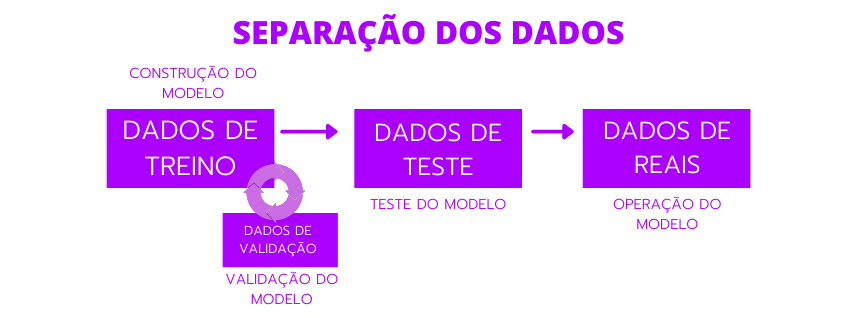

###Padronização dos dados

Como as únicas variáveis que não sofreram processo de transformação PCA são as variáveis `AMOUNT & TIME`, vamos padronizar somente elas para que a variável com maior valor não influencie o resultado devido aos valores maiores e não necessariamente porque ela é mais importante como um preditor.
* Padronizar as variáveis com Scaler irá resultar em uma média igual a 0 e um desvio padrão igual a 1.

In [327]:
# PADRONIZAÇÃO DOS DADOS
df_clean = df.copy()
scaler = StandardScaler()
df_clean['Amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['Time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1)) 

In [328]:
df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.997498,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.243433,0
1,-1.997498,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342479,0
2,-1.997477,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.156776,0
3,-1.997477,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139275,0
4,-1.997456,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.074107,0


###Seperação dos dados em treino e validação 

In [329]:
# SEPARAÇÃO DOS DADOS EM TREINO E VALIDAÇÃO
X = df_clean.drop('Class', axis=1)
y = df['Class']
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True) 

**Shuffle:** Embaralhar os dados desta maneira, nós começamos a diminuir a influência de aleatoriedades nas posições, ou talvez de uma pré determinação das posições dos elementos, sobre o resultado.

**Stratify:** Faz uma divisão de forma que a proporção dos valores na amostra produzida seja a mesma que a proporção dos valores fornecidos ao parâmetro stratify.

* Por exemplo, se a variável y é uma variável categórica binário com valores 0 e 1, e há 25% de zeros e 75% de um, stratify=y vai se certificar de que a sua divisão aleatória tem 25% de 0's e 75% de 1' s, assim não ocorrer do sistema separar os dados e não ter dados da variável faltando.

###Balanceamento dos dados 
Usaremos duas técnicas de balanceamento dos dados:
* **Undersampling:** O Under-sampling vai extrair um subconjunto aleatório da classe majoritária, preservando as características da classe minoritária, sendo ideal para situações onde você tem grandes volumes de dados. Apesar de reduzir o tempo computacional e de armazenamento, esta técnica descarta informações da classe majoritária, o que pode levar a uma performance inferior nas predições dela.

* **OverSampling:** O Over-sampling replica os dados já existentes, aumentando o número de instâncias das classes minoritárias. A vantagem é que nenhuma informação é descartada, porém o custo computacional será elevado e você irá deteriorar a performance do algoritmo para as classes minoritárias.


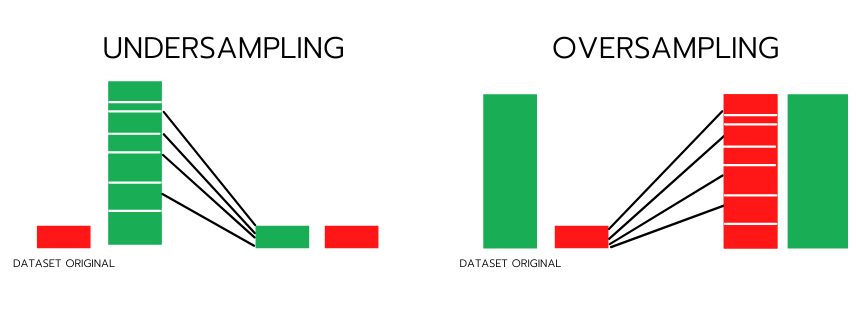

###UnderSampler

1    297
0    297
Name: Class, dtype: int64


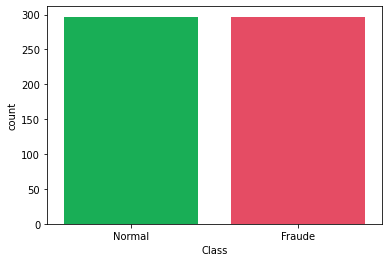

In [330]:
# TÉCNICA UNDERSAMPLING
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(y_rus.value_counts())
sns.countplot(x= y_rus)
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.show()


###OverSampler

1    180104
0    180104
Name: Class, dtype: int64


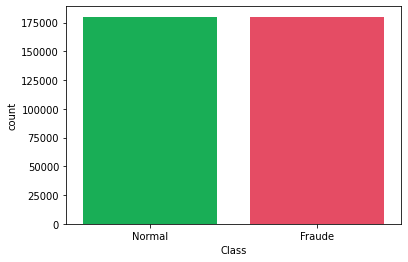

In [331]:
# TÉCNICA OVERSAMPLING
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print(pd.Series(y_ros).value_counts())
sns.countplot(x=y_ros);
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.show()

### Grafico de correlação

In [332]:
# DEFINIÇÃO DAS VARIÁVEIS DA CORREÇÃO
train_corr = X_train.corr()
rus_corr = X_rus.corr()
ros_corr = X_ros.corr()

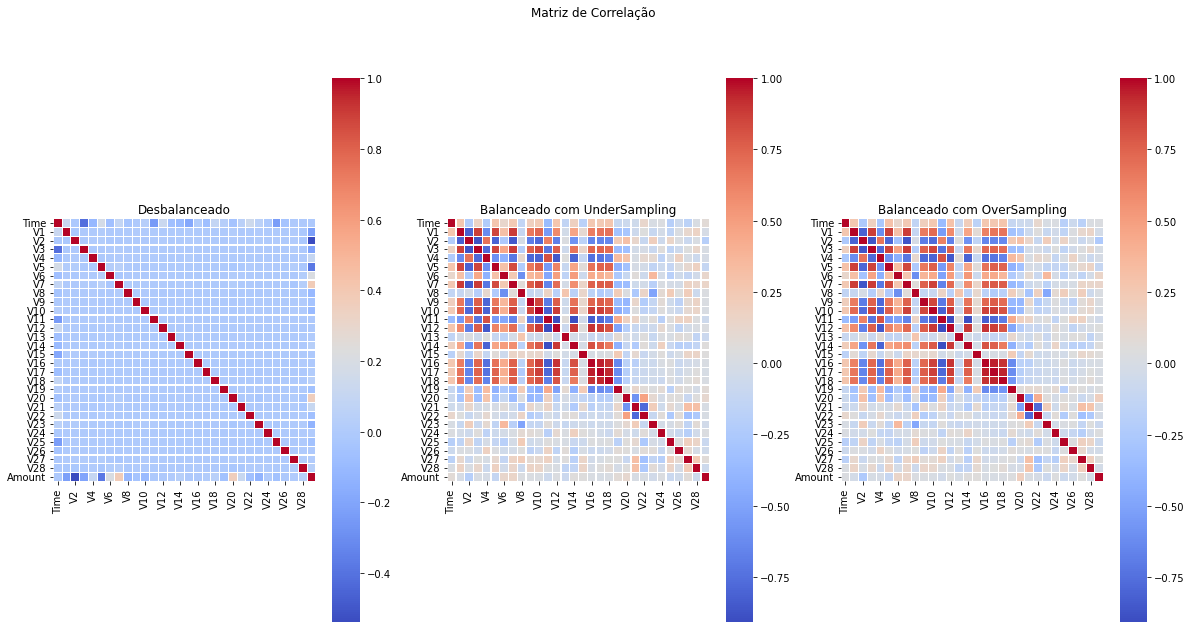

In [333]:
#PLOT DO MAPA DE CORRELAÇÃO
fig, ax = plt.subplots(nrows=1 , ncols=3, figsize=(20, 10))
fig.suptitle('Matriz de Correlação')

sns.heatmap(train_corr, linecolor='white', cmap='coolwarm', linewidths=.1, square=True, ax= ax[0])
ax[0].set_title('Desbalanceado')
sns.heatmap(rus_corr, linecolor='white', cmap='coolwarm', linewidths=.1, square=True, ax= ax[1])
ax[1].set_title('Balanceado com UnderSampling')
sns.heatmap(ros_corr, linecolor='white', cmap='coolwarm', linewidths=.1, square=True, ax= ax[2])
ax[2].set_title('Balanceado com OverSampling')

plt.tight_layout
plt.show()

Com o gráfico de correlação vemos que balancear os dados têm uma importância significativa no nosso modelo escolhido já que com os dados balanceados é possível identificar melhor as correlações entre as variáveis.

---
Agora que os dados já foram preparados vamos definir alguns modelos de machine learning e identificar qual teve o melhor resultado e que será usado para os dados de simulação real.

#Modelo de Machine Learning

Vamos análisar 5 Modelos de Machine Learning, são eles:
* **Modelo de regressão logística UnderSampling**
* **Modelo de regressão logística OverSampling**
* **Modelo de árvore de decisão**
* **Modelo de árvore de decisão UnderSampling**
* **Modelo de árvore de decisão OverSampling**

**Modelo de regressão logística -** A regressão logística é um algoritmo que lida com questões e problemas de classificação. É um dos algoritmos de machine learning mais conhecidos e utilizados no mundo, sendo empregado em diferentes áreas, como a cibersegurança e a biologia.

**Modelo de árvore de decisão -** Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais).

O Modelo que ter os melhores desempenhos sera usado para os dados de simulação real a qual definiram o final do projeto.

As formas de desempenho avaliadas nos modelos serão principalmente:
* **Matriz Confusão:**

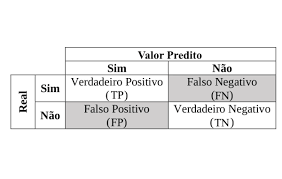

**Tipos de erros**

- **Verdadeiro positivo (*true positive* — TP):** Por exemplo, quando a operação é fraudulenta e o modelo classifica como fraudulenta.
- **Falso positivo (*false positive* — FP):** Por exemplo, quando a operação não é fraudulenta e o modelo classifica como fraudulenta.
- **Falso negativo (*true negative* — TN)**: Por exemplo, quando a operação  é fraudulenta e o modelo classifica como não fraudulenta.
- **Verdadeiro negativo (*false negative* — FN):** Por exemplo, quando a operação não é fraudulenta e o modelo classifica como não fraudulenta.

---
* **Acuracia:** A acurácia mostra diretamente a porcentagem de acertos do nosso modelo.
* **Recall:** Mostra a proporção de positivos encontrados corretamente, ou seja, o quanto o modelo é capaz de prever as fraudes.
* **AUC:** A curva AUC é derivada da curva ROC, então vamos inicialmente entender a curva ROC, A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.

O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.

##Modelo de Regressão Logística UnderSampling

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.9999    0.9512    0.9749     60035
           1     0.0311    0.9495    0.0602        99

    accuracy                         0.9512     60134
   macro avg     0.5155    0.9503    0.5176     60134
weighted avg     0.9983    0.9512    0.9734     60134

AUC: 0.950


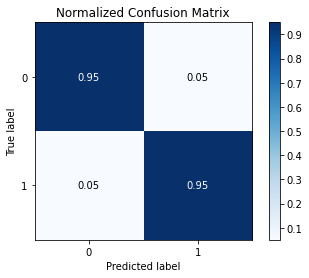

In [334]:
# DEFININDO O MODELO E TREINANDO OS DADOS
modelrus = LogisticRegression()
modelrus.fit(X_rus, y_rus)
# FAZER AS PREVISÕES EM CIMA DOS DADOS DE TESTE
y_predrus = modelrus.predict(X_val)
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_val, y_predrus, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_val, y_predrus, digits=4))
# AUC
print('AUC: {:.3f}'.format(roc_auc_score(y_val, y_predrus)))

##Modelo de Regressão Logística OverSampling

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.9999    0.9757    0.9876     60035
           1     0.0605    0.9495    0.1137        99

    accuracy                         0.9756     60134
   macro avg     0.5302    0.9626    0.5507     60134
weighted avg     0.9984    0.9756    0.9862     60134

AUC: 0.9626


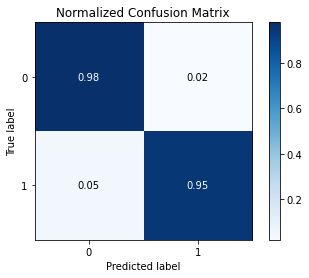

In [335]:
# DEFININDO O MODELO E TREINANDO OS DADOS
modelros = LogisticRegression()
modelros.fit(X_ros, y_ros)
# FAZER AS PREVISÕES EM CIMA DOS DADOS DE TESTE
y_predros = modelros.predict(X_val)
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_val, y_predros, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_val, y_predros, digits=4))
# AUC
print("AUC: {:.4f}".format(roc_auc_score(y_val, y_predros)))

##Modelo de Árvore de Decisão


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     60035
           1     0.8395    0.6869    0.7556        99

    accuracy                         0.9993     60134
   macro avg     0.9195    0.8433    0.8776     60134
weighted avg     0.9992    0.9993    0.9992     60134

AUC: 0.8433


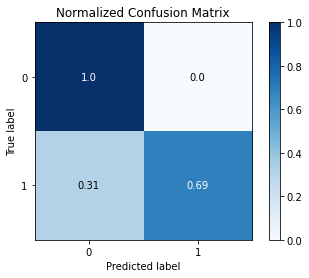

In [336]:
# DEFININDO O MODELO E TREINANDO OS DADOS
modeltree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modeltree.fit(X_train, y_train)
# FAZER AS PREVISÕES EM CIMA DOS DADOS DE TESTE
y_predtree = modeltree.predict(X_val)
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_val, y_predtree, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_val, y_predtree, digits=4))
# AUC
print("AUC: {:.4f}".format(roc_auc_score(y_val, y_predtree)))

##Modelo de Árvore de Decisão com UnderSampling

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.9999    0.9630    0.9811     60035
           1     0.0394    0.9192    0.0755        99

    accuracy                         0.9629     60134
   macro avg     0.5196    0.9411    0.5283     60134
weighted avg     0.9983    0.9629    0.9796     60134

AUC: 0.9411



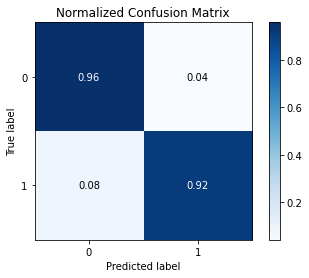

In [337]:
# DEFININDO O MODELO E TREINANDO OS DADOS
modeltreerus = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modeltreerus.fit(X_rus, y_rus)
# FAZER AS PREVISÕES EM CIMA DOS DADOS DE TESTE
y_predtreerus = modeltreerus.predict(X_val)
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_val, y_predtreerus, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_val, y_predtreerus, digits=4))
# AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_predtreerus)))

##Modelo de Árvore de Decisão com OverSampling

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.9998    0.9544    0.9766     60035
           1     0.0319    0.9091    0.0616        99

    accuracy                         0.9544     60134
   macro avg     0.5159    0.9318    0.5191     60134
weighted avg     0.9982    0.9544    0.9751     60134

AUC: 0.9318



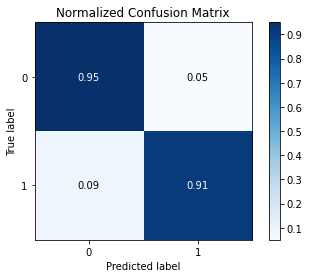

In [338]:
# DEFININDO O MODELO E TREINANDO OS DADOS
modeltreeros = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modeltreeros.fit(X_ros, y_ros)
# FAZER AS PREVISÕES EM CIMA DOS DADOS DE TESTE
y_predtreeros = modeltreeros.predict(X_val)
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_val, y_predtreeros, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_val, y_predtreeros, digits=4))
# AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_predtreeros)))

##Conclusão de desempenho dos modelos
O Modelo com melhor desempenho foi Regressão Logística com OverSampling, a qual obteve as métricas de desempenho:
* **ACURÁCIA:** 97.56% - Porcentagem de acertos do nosso modelo.
* **RECALL:** 94.95% - Capacidade de prever Falsos negativos.
* **AUC:** 96.26% - Precisão das classificações entre Fraude e normal.

De acordo com a matriz de confusão o modelo consegue prever corretamente 95% das operações fraudulentas como fraudulentas e 98% das transações normais como normais

O modelo obteve ótimas métricas de previsão mesmo sendo um dataset de treino, vemos que ele sofreu processos de transformações PCA, necessitou de técnicas de padronização e balanceamento, ou seja, as métricas atingidas mesmo estando em grau de excelência não representam o máximo de previsão possível em um modelo de Machine Learning.


## Avaliando o Modelo com dados de simulação real



No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de simulaçao. 

Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desse simples modelo com os dados de simulação.

O que faremos é apenas utilizar o modelo que treinamos com um novo conjunto. Mas, para que os resultados sejam justos, precisamos fazer com que os novos dados estejam nas mesmas condições daqueles que o nosso modelo espera.

Nesse caso, precisamos padronizar as colunas Time e Amount. Não podemos balancear os dados pois haveria perda. Nosso modelo precisa ser tratado mas precisamos fazer previsões em todas as linhas que ele receber.

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.9999    0.9505    0.9746     42378
           1     0.0296    0.9275    0.0574        69

    accuracy                         0.9505     42447
   macro avg     0.5148    0.9390    0.5160     42447
weighted avg     0.9983    0.9505    0.9731     42447

AUC: 0.9390


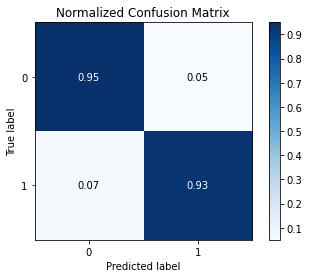

In [339]:
# ESCOLHENDO O MÉTODO DE PADRONIZAÇÃO
simu = simu_real.copy()
simu_scaler = StandardScaler()
# PADRONIZAÇÃO DAS VARIÁVEIS AMOUNT E TIME
simu['Amount'] = simu_scaler.fit_transform(simu['Amount'].values.reshape(-1, 1))
simu['Time'] = simu_scaler.fit_transform(simu['Time'].values.reshape(-1, 1))
# DEFININDO X E Y 
X_simu = simu.drop('Class', axis=1)
y_simu = simu['Class']
# FAZER AS PREVISÕES EM CIMA DOS DADOS DE SIMULAÇÃO
y_predsimu = modelrus.predict(X_simu) 
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_simu, y_predsimu, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_simu, y_predsimu, digits=4))
# AUC
print("AUC: {:.4f}".format(roc_auc_score(y_simu, y_predsimu)))


###Conclusão final

O Modelo obteve as métricas de desempenho:
* **ACURÁCIA:** 95.05% - Porcentagem de acertos do nosso modelo.
* **RECALL:** 92.75% - Capacidade de prever Falsos negativos.
* **AUC:** 93.90% - Precisão das classificações entre Fraude e normal.

De acordo com a matriz de confusão o modelo consegue prever corretamente 93% das operações fraudulentas como fraudulentas e 95% das transações normais como normais

O Modelo com os dados de simulação real apresentou ótimos resultados, mesmo sendo um dataset de treino vemos que ele sofreu processos de transformações PCA, necessitou de técnicas de padronização e balanceamento, ou seja, as métricas atingidas mesmo estando em grau de excelência não representam o máximo de previsão possível em um modelo de Machine Learning.